# <center>Comparison of TSE<center>

In [4]:
import numpy as np
import pandas as pd
import os
import sys
import glob

In [83]:
sTSEDir1='/project/bioinformatics/DLLab/STUDIES/ABIDE1/RawDataBIDS'\
        '/NYU/Derivatives/DLLabPipeline/IMPAC_TSE'
sTSEDir2='/project/bioinformatics/DLLab/STUDIES/ABIDE2/Source'\
        '/GroupBySite/ABIDEII-NYU_1/Derivatives/DLLabPipeline/IMPAC_TSE'
sTSEDir3='/project/bioinformatics/DLLab/STUDIES/ABIDE2/Source'\
        '/GroupBySite/ABIDEII-NYU_2/Derivatives/DLLabPipeline/IMPAC_TSE'
lsAtlases=['BASC064', 'BASC122', 'BASC197']

In [92]:
import sklearn.preprocessing as skp

In [177]:
dData1={}
dData2={}
dData3={}

cScaler=skp.PowerTransformer()
for sAtlas in lsAtlases:
    lsFiles1 = glob.glob(f'{sTSEDir1}/{sAtlas}/*.npy')
    dData1[sAtlas] = np.stack([(cScaler.fit_transform(np.load(sFile).T))*Data[0]['connectivity']['basc064'].flatten().std() for sFile in lsFiles1])
    lsFiles2 = glob.glob(f'{sTSEDir2}/{sAtlas}/*.npy')
    dData2[sAtlas] = np.stack([(cScaler.fit_transform(np.load(sFile).T))*Data[0]['connectivity']['basc122'].flatten().std() for sFile in lsFiles2])
    lsFiles3 = glob.glob(f'{sTSEDir3}/{sAtlas}/*.npy')
    dData3[sAtlas] = np.stack([(cScaler.fit_transform(np.load(sFile).T))*Data[0]['connectivity']['basc197'].flatten().std() for sFile in lsFiles3])

In [178]:
dTest1={}
dTest2={}
dTest3={}

for sKey in dData1.keys():
    dTest1[sKey]=dData1[sKey].flatten()
    
for sKey in dData2.keys():
    dTest2[sKey]=dData2[sKey].flatten()
    
for sKey in dData3.keys():
    dTest3[sKey]=dData3[sKey].flatten()

In [179]:
import matplotlib.pyplot as plt

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


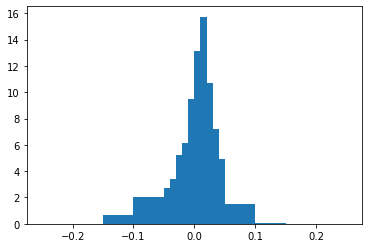

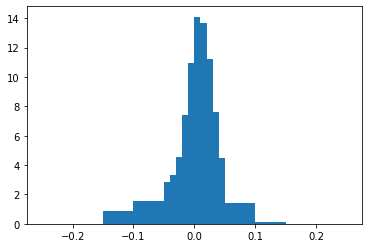

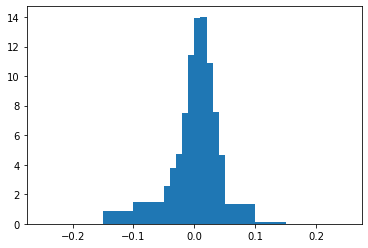

In [200]:
for i in range(3):
    plt.hist(dTest1[lsAtlases[i]]*0.1,normed=True,
             bins=[-0.25, -0.2,-0.15,-0.1,-0.05, -0.04, -0.03, -0.02, -0.01,0,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.25])
    plt.show()

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


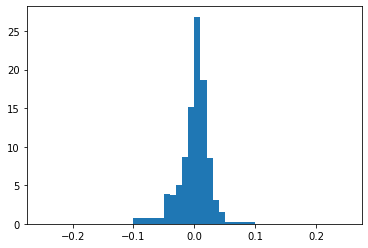

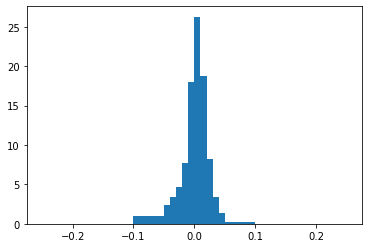

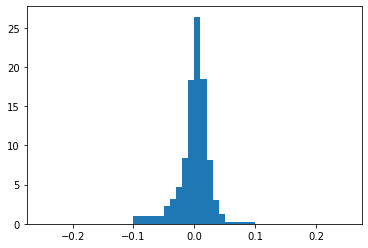

In [201]:
for i in range(3):
    plt.hist(dTest2[lsAtlases[i]]*0.1,normed=True,
             bins=[-0.25, -0.2,-0.15,-0.1,-0.05, -0.04, -0.03, -0.02, -0.01,0,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.25])
    plt.show()

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


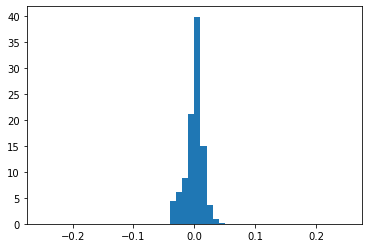

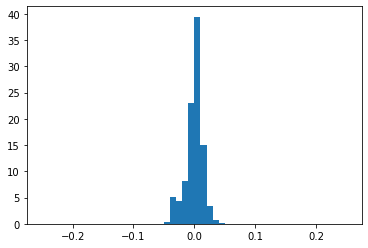

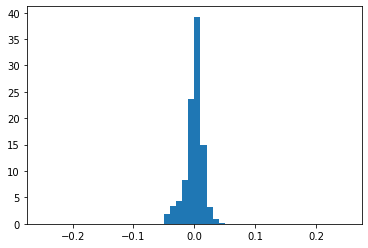

In [203]:
for i in range(3):
    plt.hist(dTest3[lsAtlases[i]]*0.1, normed=True,
             bins=[-0.25, -0.2,-0.15,-0.1,-0.05, -0.04, -0.03, -0.02, -0.01,0,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.25])
    plt.show()

In [183]:
import pickle as pkl

In [184]:
Data=pkl.load(open('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/TrainTestDataWithConfounds.p', 'rb'))

In [205]:
Data[0]['connectivity']['basc197'].flatten().std()**2

0.019871239496136874

In [208]:
from scipy.signal import peak_widths

In [219]:
np.std(Data[0]['connectivity']['basc197'].flatten())

0.14096538403500652

In [211]:
peak_widths(Data[0]['connectivity']['basc197'].flatten(), [0])

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/ipykernel_launcher.py:1: PeakPropertyWarning: some peaks have a prominence of 0
  """Entry point for launching an IPython kernel.
/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/ipykernel_launcher.py:1: PeakPropertyWarning: some peaks have a width of 0
  """Entry point for launching an IPython kernel.


(array([0.]), array([0.]), array([0.]), array([0.]))

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


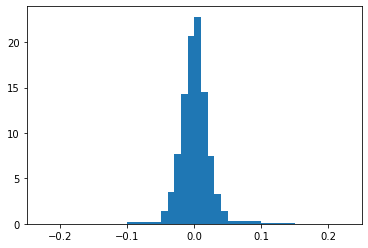

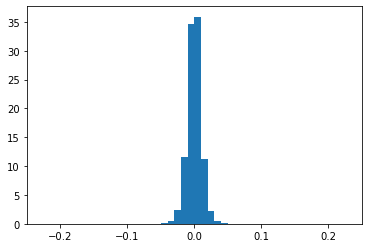

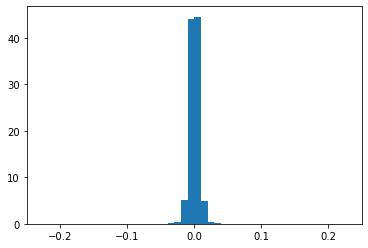

In [197]:
for s in ['basc064', 'basc122', 'basc197']:
    plt.hist(Data[0]['connectivity'][s].flatten(), normed=True,
             bins=[-0.25, -0.2,-0.15,-0.1,-0.05, -0.04, -0.03, -0.02, -0.01,0,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.25])
    plt.xlim((-0.25,0.25))
    plt.show()

# OK, so now the TSE resembles the original data mostly. Time to load up the structural data

In [292]:
sStructDir1='/project/bioinformatics/DLLab/STUDIES/ABIDE1/Derivatives'\
            '/Freesurfer_rerun'
sStructDir2='/project/bioinformatics/DLLab/STUDIES/ABIDE2/Derivatives'\
            '/Freesurfer_rerun'

In [293]:
import pandas as pd
import glob

In [294]:
lsStruct1=glob.glob(f'{sStructDir1}/*.csv')
lsStruct1=[s for s in lsStruct1 if not 'StructuralSummary' in s]
lsStruct2=glob.glob(f'{sStructDir2}/*.csv')
lsStruct2=[s for s in lsStruct2 if not 'StructuralSummary' in s]

In [295]:
pdData1=pd.read_csv(lsStruct1[0])
for sFile in lsStruct1[1:]:
    pdData1=pd.concat([pdData1, pd.read_csv(sFile)], axis=1)
    
pdData2=pd.read_csv(lsStruct2[0])
for sFile in lsStruct2[1:]:
    pdData2=pd.concat([pdData2, pd.read_csv(sFile)], axis=1)

In [296]:
lsSubs1=[s.split('/')[-3] for s in glob.glob(f'{sStructDir1}/*/stats/aseg.stats')]
lsSubs2=[s.split('/')[-3] for s in glob.glob(f'{sStructDir2}/*/stats/aseg.stats')]

In [297]:
pdData1.index=lsSubs1
pdData2.index=lsSubs2

In [298]:
pdData1

,rh.aparc.area,rh_bankssts_area,rh_caudalanteriorcingulate_area,rh_caudalmiddlefrontal_area,rh_cuneus_area,rh_entorhinal_area,rh_fusiform_area,rh_inferiorparietal_area,rh_inferiortemporal_area,rh_isthmuscingulate_area,...,lh_superiorparietal_area,lh_superiortemporal_area,lh_supramarginal_area,lh_frontalpole_area,lh_temporalpole_area,lh_transversetemporal_area,lh_insula_area,lh_WhiteSurfArea_area,BrainSegVolNotVent,eTIV
0051178,50002,993.0,717.0,2991.0,1746.0,352.0,3260.0,5700.0,3854.0,1018.0,...,5554.0,4593.0,4659.0,268.0,466.0,492.0,3086.0,96524.8,1329427.0,1.825321e+06
0050278,50003,896.0,745.0,2300.0,1651.0,421.0,3218.0,5326.0,3622.0,934.0,...,6648.0,3909.0,4742.0,273.0,372.0,517.0,2869.0,95233.4,1269478.0,1.756523e+06
0050257,50004,987.0,835.0,2824.0,1709.0,486.0,3158.0,6910.0,3470.0,948.0,...,5625.0,4864.0,4232.0,260.0,468.0,529.0,2739.0,95554.9,1313766.0,1.701968e+06
0051370,50005,1010.0,650.0,2466.0,1442.0,324.0,3368.0,5694.0,2976.0,911.0,...,5655.0,4112.0,4420.0,282.0,467.0,568.0,2788.0,88885.0,1167665.0,1.564275e+06
0050169,50006,928.0,971.0,2061.0,1683.0,478.0,3627.0,6328.0,4085.0,998.0,...,6291.0,3805.0,3927.0,319.0,446.0,436.0,2409.0,96114.9,1305905.0,1.616245e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0050386,51583,930.0,808.0,2204.0,1939.0,321.0,3848.0,5611.0,4485.0,974.0,...,6943.0,3733.0,4695.0,301.0,574.0,394.0,3293.0,105477.0,1356725.0,1.703393e+06
0051356,51584,993.0,750.0,2352.0,1569.0,659.0,3695.0,5160.0,4935.0,1536.0,...,5773.0,4546.0,4728.0,309.0,539.0,498.0,2758.0,103874.0,1290730.0,1.688640e+06
0050622,51585,911.0,839.0,2314.0,1588.0,489.0,3629.0,6839.0,3824.0,833.0,...,7686.0,4645.0,5644.0,331.0,569.0,494.0,2939.0,100189.0,1211576.0,1.605905e+06
0050700,51606,709.0,717.0,1773.0,2293.0,434.0,3082.0,4968.0,3187.0,1080.0,...,5637.0,4553.0,4465.0,274.0,471.0,495.0,2711.0,86558.6,1154016.0,1.452741e+06


In [299]:
pdData1.to_csv(f'{sStructDir1}/StructuralSummary.csv')
pdData2.to_csv(f'{sStructDir2}/StructuralSummary.csv')